In [1]:
"""Calculate information-theoretic measures of distributional
similarity based on word frequencies in two texts
"""

import collections
import math



def get_counts(word_list):
    return collections.Counter(word_list)


def create_prob_dist(count_dict):
    total_ct = sum(count_dict.values())
    p = {x: ct / total_ct for x, ct in count_dict.items()}
    return p


def count_smoothing(freq_dist, vocabulary, alpha=1):
    return {w: freq_dist.get(w, 0) + alpha for w in vocabulary}


def entropy(p):
    """Calculate entropy H(p) for a probability distribution represented
    as a mapping (dictionary) from word tokens to probabilities
    """
    h = 0

    # TODO -- Calculate entropy value in nats for probability distribution `p`
    for x in p:
        h -= p[x] * math.log(p[x])

    return h


def cross_entropy(p1, p2):
    """Calculate cross-entropy H(p1, p2) for two probability distributions
    represented as a mapping (dictionary) from word tokens to
    probabilities
    """
    xh = 0

    # TODO -- Calculate cross-entropy value H(p1, p2) in nats
    for x in p1:
        xh -= p1[x] * math.log(p2[x])

    return xh


def kl_divergence(p1, p2):
    """Calculate Kullback-Leibler divergence D_{KL}(p1||p2) for two
    probability distributions represented as a mapping (dictionary)
    from word tokens to probabilities
    """
    kl = 0

    # TODO -- Calculate KL divergence D_{KL}(p1||p2) in nats
    kl = cross_entropy(p1, p2) - entropy(p1)

    return kl

def e(p):
    l = []
    h = 0
    for x in p:
        h -= p[x] * math.log(p[x])
        l.append(h)
    return l

def c(p1, p2):
    l = []
    xh = 0
    for x in p1:
        xh -= p1[x] * math.log(p2[x])
        l.append(xh)
    return l


def kl_dd(p1, p2):
    
    entropy = e(p1)
    cross = c(p1, p2)
    kl = [x - y for x, y in zip(cross, entropy)]

    return kl




In [1]:
with open('cc-tokens.txt') as f:
    cc_tokens = f.read().lower().splitlines()

In [2]:
with open('biology-tokens.txt') as f:
    biology_tokens = f.read().lower().splitlines()

In [3]:
print(biology_tokens[:10])

['in', 'spite', 'of', 'the', 'morphological', 'and', 'developmental', 'differences', 'between', 'vertebrate']


In [4]:
# biology
ct_a = get_counts(cc_tokens)
# print(ct_a)
ct_b = get_counts(biology_tokens)
# print(ct_b)

vocab = set(ct_a.keys()) | set(ct_b.keys())
ct_a = count_smoothing(ct_a, vocab)
# print(ct_a)
ct_b = count_smoothing(ct_b, vocab)

p_a = create_prob_dist(ct_a)
p_b = create_prob_dist(ct_b)


kl_ab = kl_divergence(p_a, p_b)
print(kl_ab)
    
kl_ba = kl_divergence(p_b, p_a)
print(kl_ba)

1.3953291406940274
1.3917604586536854


In [4]:
with open('chemistry-tokens.txt') as f:
    biology_tokens = f.read().lower().splitlines()
    
# chemistry
ct_a = get_counts(cc_tokens)
# print(ct_a)
ct_b = get_counts(biology_tokens)
# print(ct_b)

vocab = set(ct_a.keys()) | set(ct_b.keys())
ct_a = count_smoothing(ct_a, vocab)
# print(ct_a)
ct_b = count_smoothing(ct_b, vocab)

p_a = create_prob_dist(ct_a)
p_b = create_prob_dist(ct_b)


kl_ab = kl_divergence(p_a, p_b)
print(kl_ab)
    
kl_ba = kl_divergence(p_b, p_a)
print(kl_ba)

1.4892076798817788
1.370622024644197


In [5]:
with open('computer-tokens.txt') as f:
    tokens = f.read().lower().splitlines()
    
# computer science
ct_a = get_counts(cc_tokens)
# print(ct_a)
ct_b = get_counts(tokens)
# print(ct_b)

vocab = set(ct_a.keys()) | set(ct_b.keys())
ct_a = count_smoothing(ct_a, vocab)
# print(ct_a)
ct_b = count_smoothing(ct_b, vocab)

p_a = create_prob_dist(ct_a)
p_b = create_prob_dist(ct_b)


kl_ab = kl_divergence(p_a, p_b)
print(kl_ab)
    
kl_ba = kl_divergence(p_b, p_a)
print(kl_ba)

1.100465612965392
1.026490990467484


In [3]:
with open('economics-tokens.txt') as f:
    tokens = f.read().lower().splitlines()
    
# economics
ct_a = get_counts(cc_tokens)
# print(ct_a)
ct_b = get_counts(tokens)
# print(ct_b)

vocab = set(ct_a.keys()) | set(ct_b.keys())
ct_a = count_smoothing(ct_a, vocab)
# print(ct_a)
ct_b = count_smoothing(ct_b, vocab)

p_a = create_prob_dist(ct_a)
p_b = create_prob_dist(ct_b)


kl_ab = kl_divergence(p_a, p_b)
print(kl_ab)
    
kl_ba = kl_divergence(p_b, p_a)
print(kl_ba)

0.7843515970190342
0.6954866376363178


In [3]:
with open('engineering-tokens.txt') as f:
    tokens = f.read().lower().splitlines()
    
# engineering
ct_a = get_counts(cc_tokens)
# print(ct_a)
ct_b = get_counts(tokens)
# print(ct_b)

vocab = set(ct_a.keys()) | set(ct_b.keys())
ct_a = count_smoothing(ct_a, vocab)
# print(ct_a)
ct_b = count_smoothing(ct_b, vocab)

p_a = create_prob_dist(ct_a)
p_b = create_prob_dist(ct_b)


kl_ab = kl_divergence(p_a, p_b)
print(kl_ab)
    
kl_ba = kl_divergence(p_b, p_a)
print(kl_ba)

0.9704102935975527
0.8744780093122486


In [10]:
p_a['gaboury']

1.7290288647951714e-08

In [4]:
with open('philosophy-tokens.txt') as f:
    tokens = f.read().lower().splitlines()
    
# philosophy
ct_a = get_counts(cc_tokens)
# print(ct_a)
ct_b = get_counts(tokens)
# print(ct_b)

vocab = set(ct_a.keys()) | set(ct_b.keys())
ct_a = count_smoothing(ct_a, vocab)
# print(ct_a)
ct_b = count_smoothing(ct_b, vocab)

p_a = create_prob_dist(ct_a)
print(p_a)
p_b = create_prob_dist(ct_b)


kl_ab = kl_divergence(p_a, p_b)
print(kl_ab)
    
kl_ba = kl_divergence(p_b, p_a)
print(kl_ba)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.8798484126004071
1.0094529875024048


In [5]:
with open('psychology-tokens.txt') as f:
    tokens = f.read().lower().splitlines()
    
# psychology
ct_a = get_counts(cc_tokens)
# print(ct_a)
ct_b = get_counts(tokens)
# print(ct_b)

vocab = set(ct_a.keys()) | set(ct_b.keys())
ct_a = count_smoothing(ct_a, vocab)
# print(ct_a)
ct_b = count_smoothing(ct_b, vocab)

p_a = create_prob_dist(ct_a)
p_b = create_prob_dist(ct_b)


kl_ab = kl_divergence(p_a, p_b)
print(kl_ab)
    
kl_ba = kl_divergence(p_b, p_a)
print(kl_ba)

0.8602824444201698
0.8758825158417558


In [6]:
with open('sociology-tokens.txt') as f:
    tokens = f.read().lower().splitlines()
    
# sociology
ct_a = get_counts(cc_tokens)
# print(ct_a)
ct_b = get_counts(tokens)
# print(ct_b)

vocab = set(ct_a.keys()) | set(ct_b.keys())
ct_a = count_smoothing(ct_a, vocab)
# print(ct_a)
ct_b = count_smoothing(ct_b, vocab)

p_a = create_prob_dist(ct_a)
p_b = create_prob_dist(ct_b)


kl_ab = kl_divergence(p_a, p_b)
print(kl_ab)
    
kl_ba = kl_divergence(p_b, p_a)
print(kl_ba)

0.5554565950380557
0.5205863947668457


In [4]:
with open('art-tokens.txt') as f:
    tokens = f.read().lower().splitlines()
    
# sociology
ct_a = get_counts(cc_tokens)
# print(ct_a)
ct_b = get_counts(tokens)
# print(ct_b)

vocab = set(ct_a.keys()) | set(ct_b.keys())
ct_a = count_smoothing(ct_a, vocab)
# print(ct_a)
ct_b = count_smoothing(ct_b, vocab)

p_a = create_prob_dist(ct_a)
p_b = create_prob_dist(ct_b)


kl_ab = kl_divergence(p_a, p_b)
print(kl_ab)
    
kl_ba = kl_divergence(p_b, p_a)
print(kl_ba)

0.7645831018661013
1.0654439636665174


In [4]:
with open('physics-tokens.txt') as f:
    tokens = f.read().lower().splitlines()
    
# sociology
ct_a = get_counts(cc_tokens)
# print(ct_a)
ct_b = get_counts(tokens)
# print(ct_b)

vocab = set(ct_a.keys()) | set(ct_b.keys())
ct_a = count_smoothing(ct_a, vocab)
# print(ct_a)
ct_b = count_smoothing(ct_b, vocab)

p_a = create_prob_dist(ct_a)
p_b = create_prob_dist(ct_b)


kl_ab = kl_divergence(p_a, p_b)
print(kl_ab)
    
kl_ba = kl_divergence(p_b, p_a)
print(kl_ba)

1.5620148386710095
1.39688622264058


In [2]:
import pickle
infile=open('cc', 'rb')
cc_freq = pickle.load(infile)
infile.close()

infile=open('bio', 'rb')
bio_freq = pickle.load(infile)
infile.close()

infile=open('che', 'rb')
che_freq = pickle.load(infile)
infile.close()

infile=open('cs', 'rb')
com_freq = pickle.load(infile)
infile.close()

infile=open('phi', 'rb')
phy_freq = pickle.load(infile)
infile.close()

infile=open('psy', 'rb')
psy_freq = pickle.load(infile)
infile.close()


infile=open('eco', 'rb')
eco_freq = pickle.load(infile)
infile.close()

infile=open('art', 'rb')
art_freq = pickle.load(infile)
infile.close()

infile=open('soc', 'rb')
soc_freq = pickle.load(infile)
infile.close()

infile=open('philo', 'rb')
phi_freq = pickle.load(infile)
infile.close()

infile=open('eng', 'rb')
eng_freq = pickle.load(infile)
infile.close()

In [23]:
# philosophy

vocab = set(cc_freq.keys()) | set(phi_freq.keys())
ct_a = count_smoothing(cc_freq, vocab)
# print(ct_a)
ct_b = count_smoothing(phi_freq, vocab)

p_a = create_prob_dist(ct_a)
p_b = create_prob_dist(ct_b)


kl_ab = kl_dd(p_a, p_b)

    
#kl_ba = kl_dd(p_b, p_a)
#print(kl_ba)


In [24]:
# biology

vocab = set(cc_freq.keys()) | set(bio_freq.keys())
ct_a = count_smoothing(cc_freq, vocab)
# print(ct_a)
ct_b = count_smoothing(bio_freq, vocab)

p_a = create_prob_dist(ct_a)
p_b = create_prob_dist(ct_b)


kl_bio = kl_dd(p_a, p_b)

    
#kl_ba = kl_dd(p_b, p_a)
#print(kl_ba)

In [25]:
# computer science

vocab = set(cc_freq.keys()) | set(com_freq.keys())
ct_a = count_smoothing(cc_freq, vocab)
# print(ct_a)
ct_b = count_smoothing(com_freq, vocab)

p_a = create_prob_dist(ct_a)
p_b = create_prob_dist(ct_b)


kl_cs= kl_dd(p_a, p_b)

    
#kl_ba = kl_dd(p_b, p_a)
#print(kl_ba)

In [26]:
# physics

vocab = set(cc_freq.keys()) | set(phy_freq.keys())
ct_a = count_smoothing(cc_freq, vocab)
# print(ct_a)
ct_b = count_smoothing(phy_freq, vocab)

p_a = create_prob_dist(ct_a)
p_b = create_prob_dist(ct_b)


kl_phy= kl_dd(p_a, p_b)

    
#kl_ba = kl_dd(p_b, p_a)
#print(kl_ba)

In [27]:
# art

vocab = set(cc_freq.keys()) | set(art_freq.keys())
ct_a = count_smoothing(cc_freq, vocab)
# print(ct_a)
ct_b = count_smoothing(art_freq, vocab)

p_a = create_prob_dist(ct_a)
p_b = create_prob_dist(ct_b)


kl_art= kl_dd(p_a, p_b)

    
#kl_ba = kl_dd(p_b, p_a)
#print(kl_ba)

In [28]:
# engineering

vocab = set(cc_freq.keys()) | set(eng_freq.keys())
ct_a = count_smoothing(cc_freq, vocab)
# print(ct_a)
ct_b = count_smoothing(eng_freq, vocab)

p_a = create_prob_dist(ct_a)
p_b = create_prob_dist(ct_b)


kl_eng= kl_dd(p_a, p_b)

    
#kl_ba = kl_dd(p_b, p_a)
#print(kl_ba)

In [29]:
# psychology

vocab = set(cc_freq.keys()) | set(psy_freq.keys())
ct_a = count_smoothing(cc_freq, vocab)
# print(ct_a)
ct_b = count_smoothing(psy_freq, vocab)

p_a = create_prob_dist(ct_a)
p_b = create_prob_dist(ct_b)


kl_psy= kl_dd(p_a, p_b)

    
#kl_ba = kl_dd(p_b, p_a)
#print(kl_ba)

In [30]:
# economics

vocab = set(cc_freq.keys()) | set(eco_freq.keys())
ct_a = count_smoothing(cc_freq, vocab)
# print(ct_a)
ct_b = count_smoothing(eco_freq, vocab)

p_a = create_prob_dist(ct_a)
p_b = create_prob_dist(ct_b)


kl_eco = kl_dd(p_a, p_b)

    
#kl_ba = kl_dd(p_b, p_a)
#print(kl_ba)

In [31]:
# chemistry

vocab = set(cc_freq.keys()) | set(che_freq.keys())
ct_a = count_smoothing(cc_freq, vocab)
# print(ct_a)
ct_b = count_smoothing(che_freq, vocab)

p_a = create_prob_dist(ct_a)
p_b = create_prob_dist(ct_b)


kl_che= kl_dd(p_a, p_b)

    
#kl_ba = kl_dd(p_b, p_a)
#print(kl_ba)

In [32]:
# sociology

vocab = set(cc_freq.keys()) | set(soc_freq.keys())
ct_a = count_smoothing(cc_freq, vocab)
# print(ct_a)
ct_b = count_smoothing(soc_freq, vocab)

p_a = create_prob_dist(ct_a)
p_b = create_prob_dist(ct_b)


kl_soc= kl_dd(p_a, p_b)

    
#kl_ba = kl_dd(p_b, p_a)
#print(kl_ba)

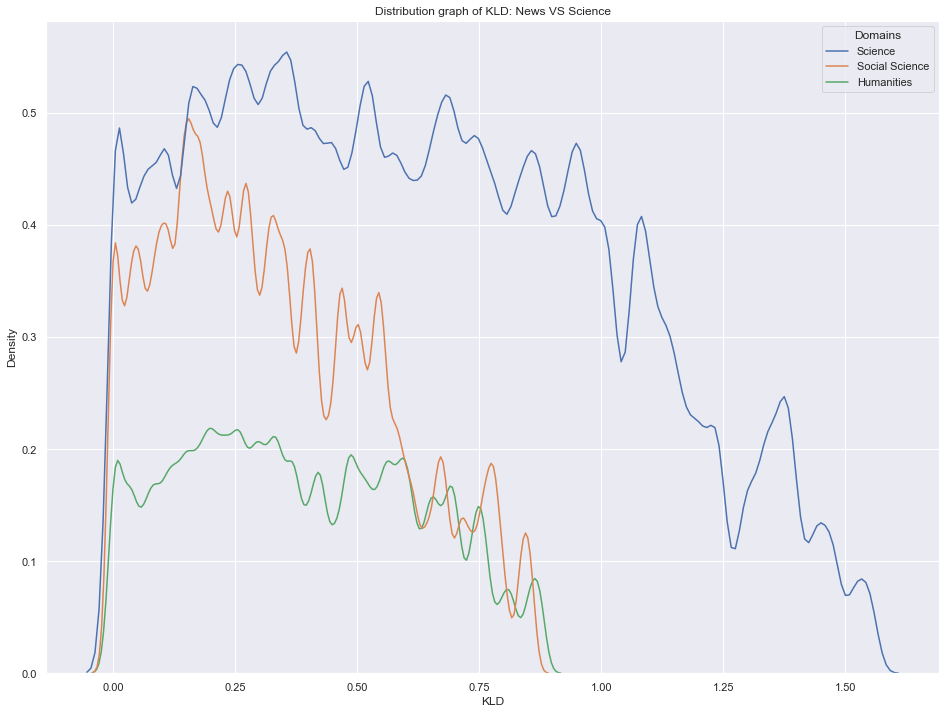

In [36]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

plt.figure(figsize=(16, 12))
sns.kdeplot(data=df, x="KLD", hue="Domains")

# sns.distplot(kl_ab, color="skyblue", label="Philosophy", hist=False, kde=True)
# sns.distplot(kl_bio, color="olive", label="Biology",hist=False, kde=True)
# sns.distplot(kl_cs, color="gold", label="Computer Science",hist=False, kde=True)
# sns.distplot(kl_phy, color="teal", label="Physics",hist=False, kde=True)
# sns.distplot(kl_che, color="lightcoral", label="Chemistry", hist=False, kde=True)
# sns.distplot(kl_eng, color="chocolate", label="Engineering",hist=False, kde=True)
# sns.distplot(kl_eco, color="orange", label="Economics",hist=False, kde=True)
# sns.distplot(kl_soc, color="forestgreen", label="Sociology",hist=False, kde=True)
# sns.distplot(kl_art, color="lightslategray", label="Art",hist=False, kde=True)
# sns.distplot(kl_psy, color="mediumpurple", label="Psychology",hist=False, kde=True)
# plt.xlabel("KLD", size=10)
# plt.ylabel("Density", size=10)
plt.title("Distribution graph of KLD: News VS Science")
# plt.legend(loc=2, prop={'size': 10})
plt.savefig('dis_new_sci')

In [33]:
lst = kl_bio + kl_cs + kl_phy +kl_che +kl_eng+kl_eco + kl_soc + kl_psy+kl_art + kl_ab

In [14]:
len(lst)

3

In [34]:
lst2 = ['Science'] * (len(kl_bio)+len(kl_cs)+len(kl_phy)+len(kl_che)+len(kl_eng)) + ['Social Science'] * (len(kl_eco)+len(kl_soc)+len(kl_psy)) + ['Humanities'] * (len(kl_art)+len(kl_ab))

In [16]:
len(lst2)

17769914

In [35]:

# import pandas as pd
import pandas as pd
df = pd.DataFrame(list(zip(lst, lst2)),columns =['KLD', 'Domains'])

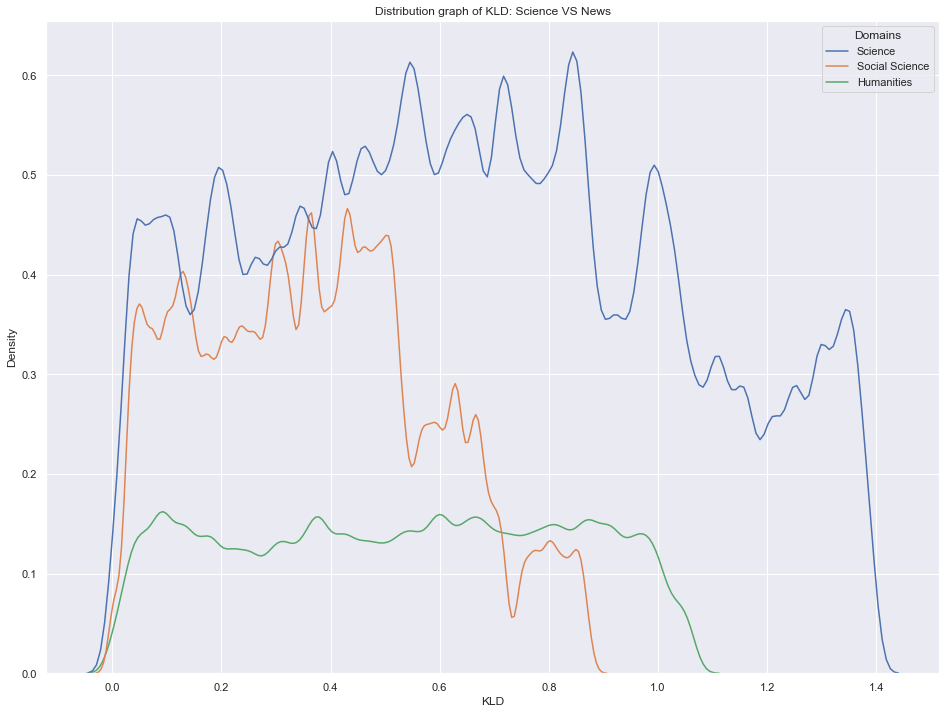

In [22]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

plt.figure(figsize=(16, 12))

sns.kdeplot(data=df, x="KLD", hue="Domains")

# sns.distplot(kl_ab, color="skyblue", label="Philosophy", hist=False, rug=True)
# sns.distplot(kl_bio, color="olive", label="Biology",hist=False, kde=True)
# sns.distplot(kl_cs, color="gold", label="Computer Science",hist=False, kde=True)
# sns.distplot(kl_phy, color="teal", label="Physics",hist=False, kde=True)
# sns.distplot(kl_che, color="lightcoral", label="Chemistry", hist=False, kde=True)
# sns.distplot(kl_eng, color="chocolate", label="Engineering",hist=False, kde=True)
# sns.distplot(kl_eco, color="orange", label="Economics",hist=False, kde=True)
# sns.distplot(kl_soc, color="forestgreen", label="Sociology",hist=False, kde=True)
# sns.distplot(kl_art, color="lightslategray", label="Art",hist=False, kde=True)
# sns.distplot(kl_psy, color="mediumpurple", label="Psychology",hist=False, kde=True)
# plt.xlabel("KLD", size=10)
# plt.ylabel("Count", size=10)
plt.title("Distribution graph of KLD: Science VS News")
# plt.legend(loc=2, prop={'size': 10})
plt.savefig('dis_science')